In [1]:
import jax.numpy as jnp
import jax
from diffrax import diffeqsolve, Dopri5, ODETerm, SaveAt, PIDController
jax.config.update('jax_enable_x64',True)
import matplotlib.pyplot as plt
def lorenz(t,x, args):
    s=10
    r=28
    b=2.667
    return jnp.array([
        s*(x[1]-x[0]),
        r*x[0] - x[1] - x[0] * x[2],
        x[0]*x[1] - b * x[2]
    ])

In [2]:
term = ODETerm(lorenz)
solver = Dopri5()
saveat = SaveAt(dense=True)
stepsize_controller = PIDController(rtol=1e-8, atol=1e-8)

sol = diffeqsolve(term, solver, t0=0, t1=10, dt0=0.01, y0=jnp.array([3.,3.,20]), saveat=saveat,
                  stepsize_controller=stepsize_controller)


In [8]:
sol.evaluate(10.)

Array([ 1.94930076,  2.87025558, 15.44045931], dtype=float64)

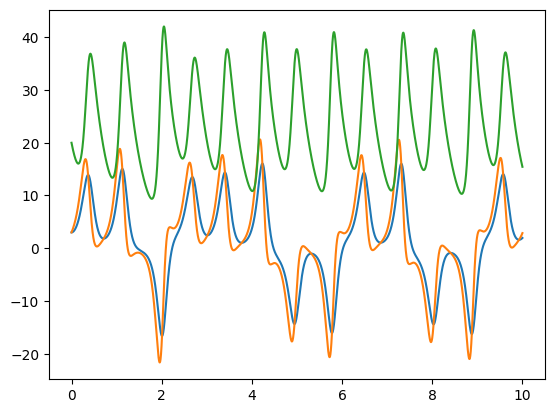

In [9]:
tvals = jnp.linspace(0,10,5000)
y_full = jax.vmap(sol.evaluate)(tvals)
plt.plot(tvals,y_full[:,0])
plt.plot(tvals,y_full[:,1])
plt.plot(tvals,y_full[:,2])


In [10]:
observation_times = jnp.linspace(0,10,60)
observation_dummies = jnp.eye(3)

In [11]:
observation_dummies

Array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float64)

In [15]:
obs_mat = jnp.tile(jnp.repeat(observation_dummies,3,axis = 0),(3,1))

In [16]:
obs_mat

Array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float64)